In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows plots to be rendered directly inside the notebook
%matplotlib inline

## Univariate Plots

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

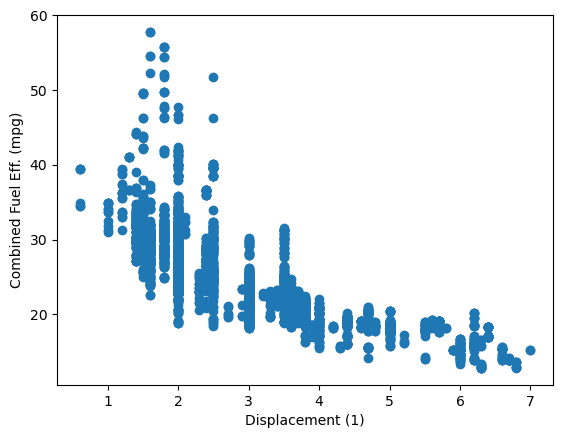

In [5]:
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)

# Scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)')

* the relationship between the two variables is negative because as higher values of the x-axis variable are increasing, the values of the variable plotted on the y-axis are decreasing.

### seaborn.regplot() : 
* Seaborn's regplot() function combines scatterplot creation with regression function fitting

### Seaborn's regplot() function combines scatterplot creation with regression function fitting

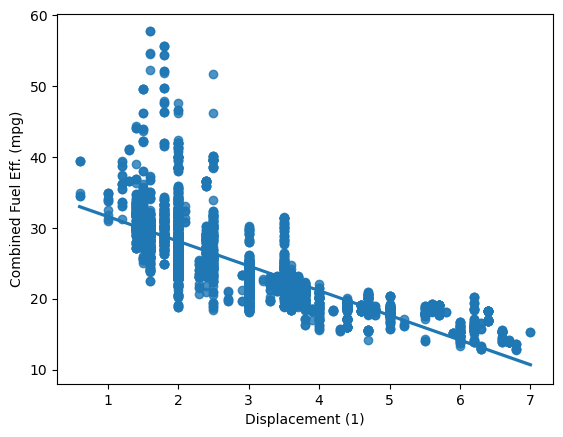

In [9]:
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Plot the regression line on the transformed data

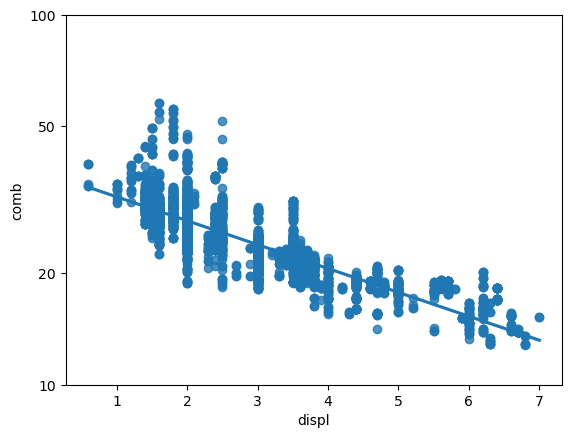

In [31]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
comb =fuel_econ['comb'].apply(log_trans)
sns.regplot(data = fuel_econ, x = 'displ',  y =comb)
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

## Overplotting, Transparency, and Jitter

* Let's see an example below for each **Jitter** to move the position of each point slightly from its true value. Jitter is not a direct option in matplotlib's **scatter()** function, but is a built-in option with seaborn's regplot() function. The x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made.

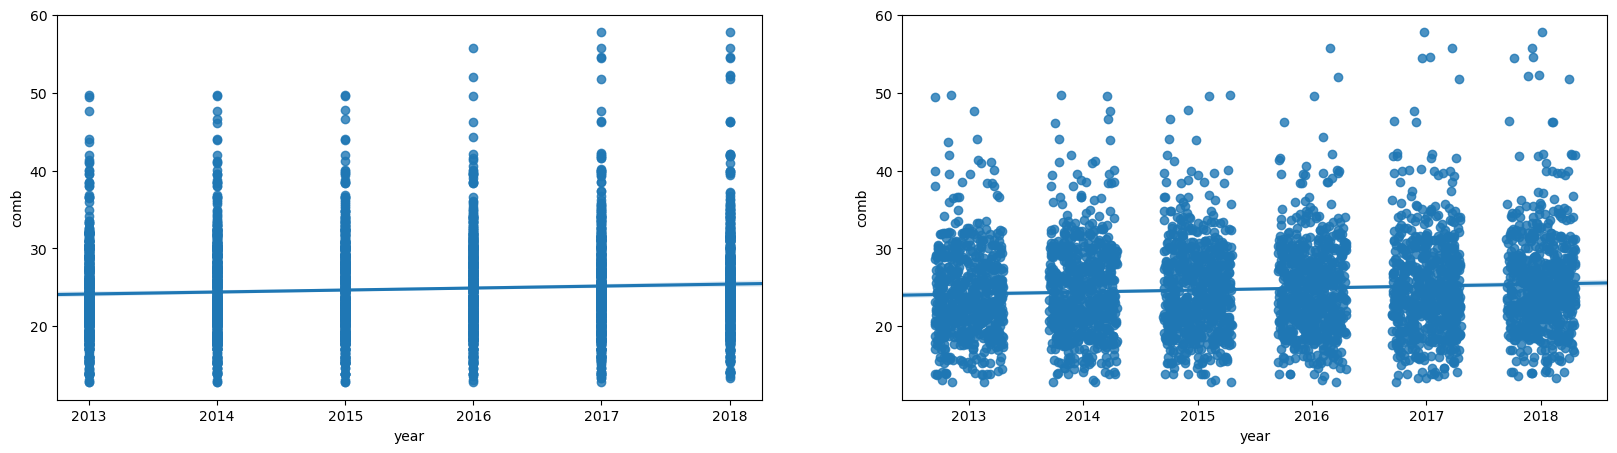

In [39]:
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)

##########################################
# Resize figure to accommodate two plots
plt.figure(figsize = [20, 5])

# PLOT ON LEFT - SIMPLE SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False);

##########################################
# PLOT ON RIGHT - SCATTER PLOT WITH JITTER
plt.subplot(1, 2, 2)

# In the sb.regplot() function below, the `truncate` argument accepts a boolean.
# If truncate=True, the regression line is bounded by the data limits. 
# Else if truncate=False, it extends to the x axis limits.
# The x_jitter will make each x value will be adjusted randomly by +/-0.3
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3);

## Plot with both Jitter and Transparency
* You can add transparency to either **scatter()** or **regplot()** by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque). 

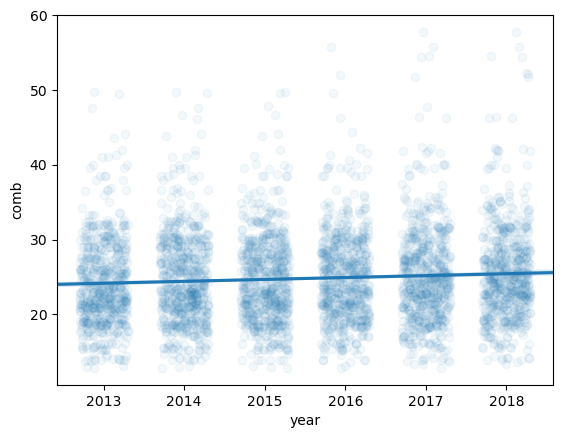

In [44]:
# The scatter_kws helps specifying the opaqueness of the data points. 
# The alpha take a value between [0-1], where 0 represents transparent, and 1 is opaque. 
sns.regplot(data = fuel_econ, x = 'year', y = 'comb', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});

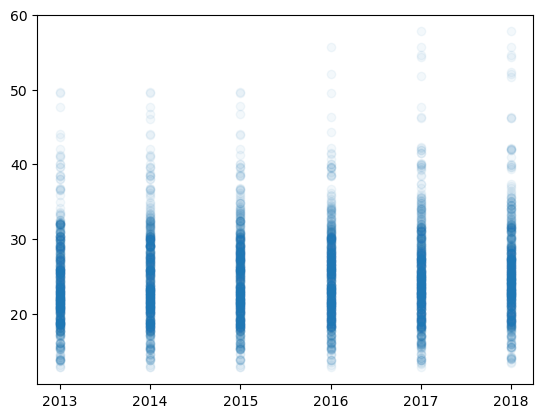

In [45]:
# Alternative way to plot with the transparency.
# The scatter() function below does NOT have any argument to specify the Jitter
plt.scatter(data = fuel_econ, x = 'year', y = 'comb', alpha=1/20);

## Heat Maps
* Heat maps are useful in the following cases:

**1**-to represent a plot for discrete vs. another discrete variable
**2**-As an alternative to transparency when the data points are enormous

### Default heat plot using Matplotlib.pyplot.hist2d() function

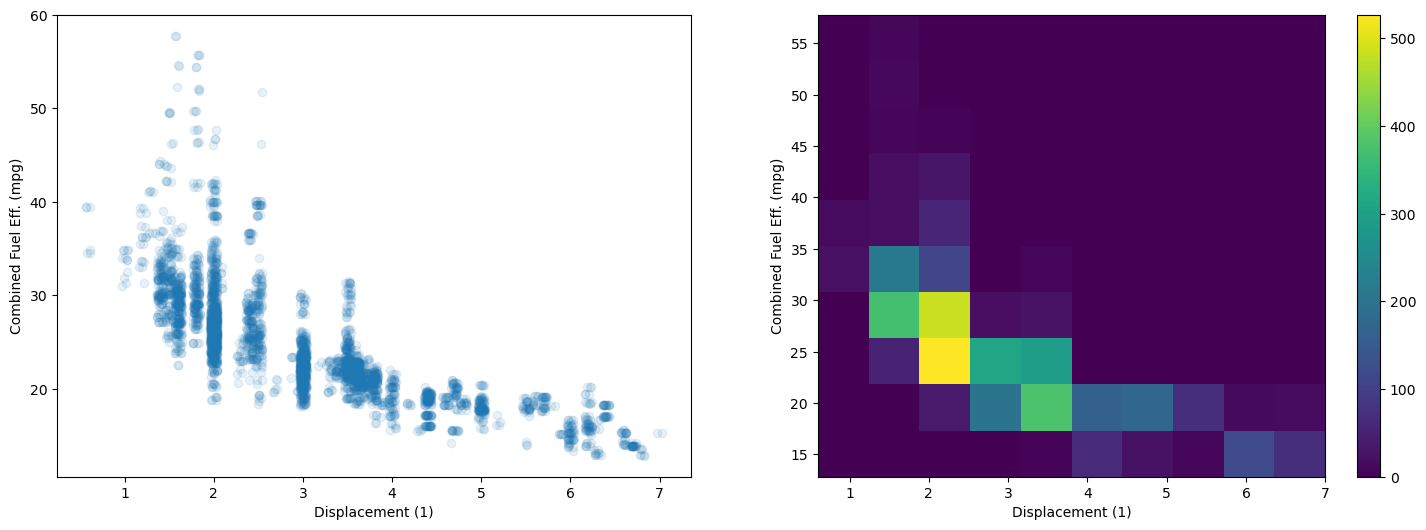

In [57]:
# Read the CSV file
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)


plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sns.regplot(data = fuel_econ, x = 'displ', y = 'comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Heat plot - Set a minimum bound on counts and a reverse color map

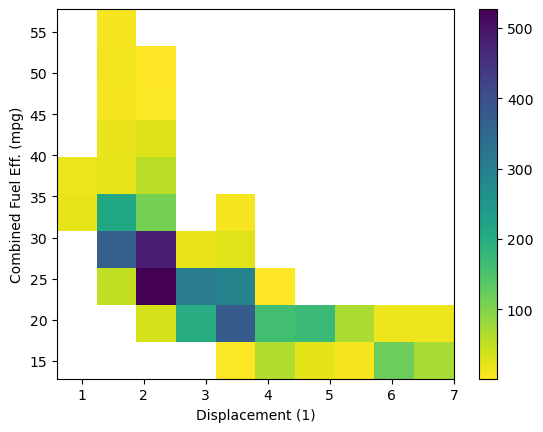

In [59]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
#  By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains
# at least one point.
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Heat plot - Specify bin edges

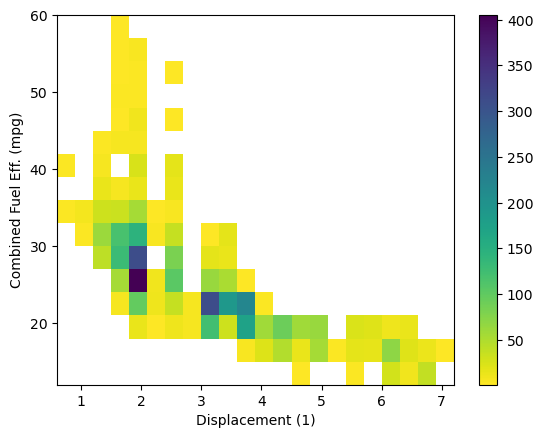

In [64]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
 
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot.

## Add text annotation on each cell using pyplot.text() function

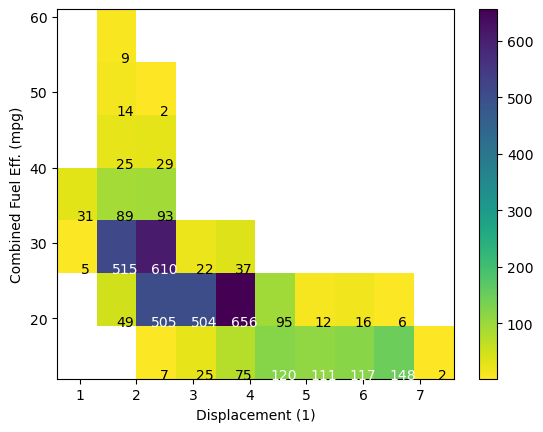

In [65]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

## Violin Plots
* There are a few ways of plotting the relationship between one **quantitative** and one **qualitative** variable, that demonstrate the data at different levels of abstraction

### Violin plot for plotting a Quantitative variable (fuel efficiency) versus Qualitative variable (vehicle class)

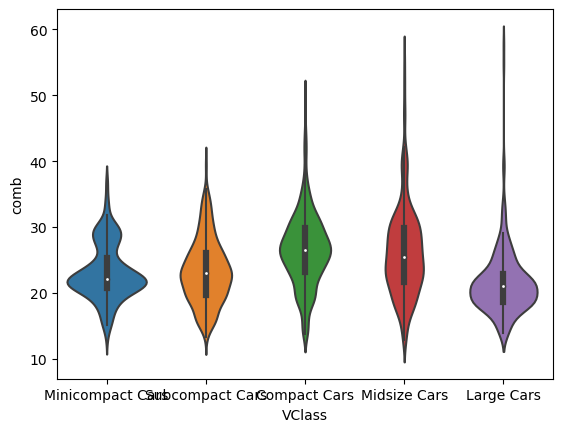

In [70]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

sns.violinplot(data=fuel_econ, x='VClass', y='comb');

In [71]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### Violin plot without datapoints in the violin interior

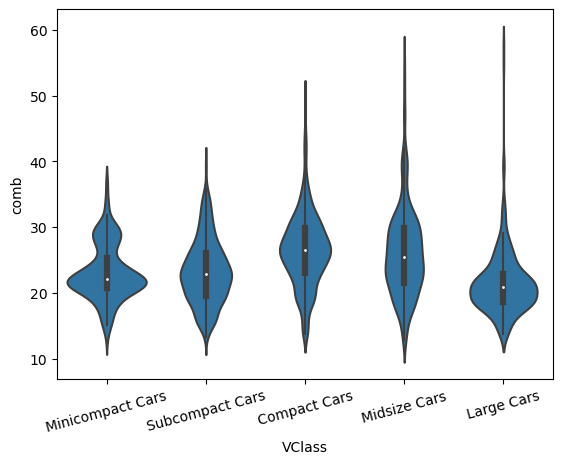

In [75]:
base_color = sns.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot. 
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner=None)
plt.xticks(rotation=15);

### render violin with horizontal bars

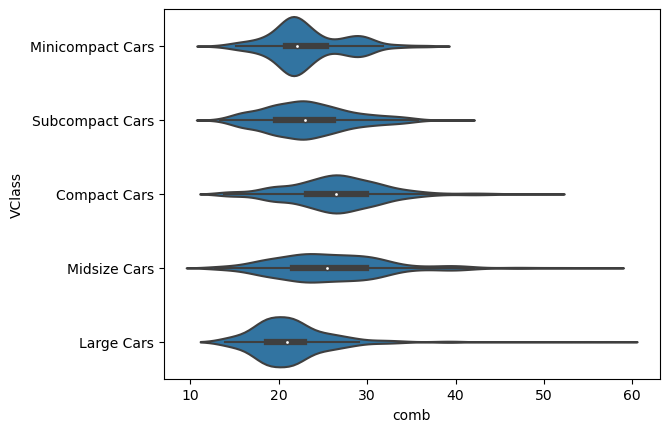

In [76]:
sns.violinplot(data=fuel_econ, y='VClass', x='comb', color=base_color, innner=None);

## Box Plots 

* A **box** plot is another way of showing the relationship between a **numeric variable** and a **categorical variable**. Compared to the violin plot, the box plot leans more on the summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level

### Violin versus Box plot

(6.966470319355814, 63.09321945242605)

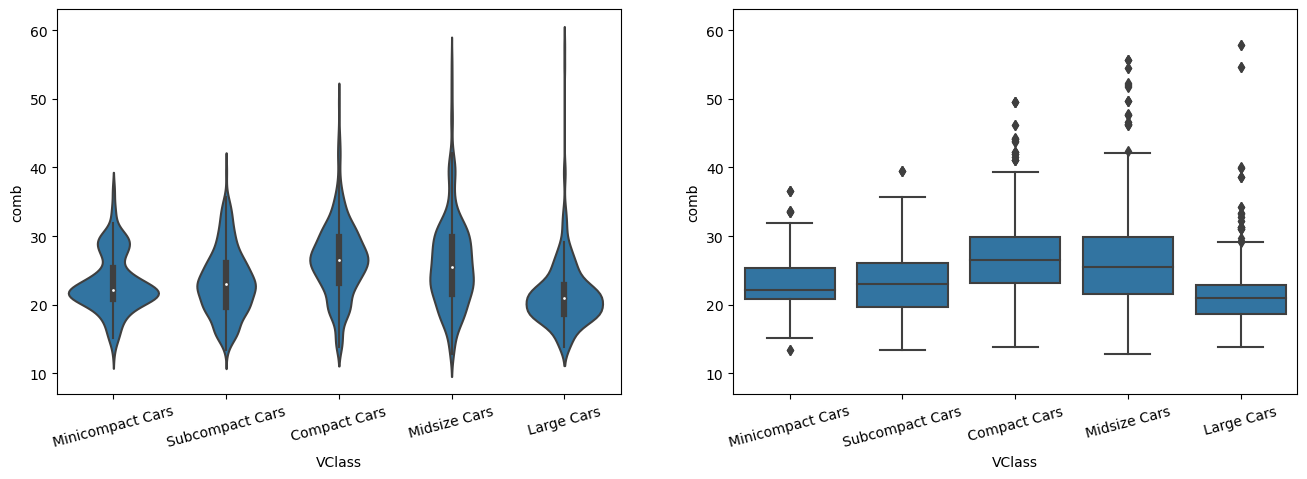

In [83]:
# Step 1. Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# allows plots to be rendered directly inside the notebook
%matplotlib inline

# Step 2. Load data
fuel_econ = pd.read_csv('Data/fuel-econ.csv')
fuel_econ.head(10)
# Step 3. Convert the "VClass" column from a plain object type into an ordered categorical type 
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sns.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, innner='quartile')
plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

### Horizontal box plot

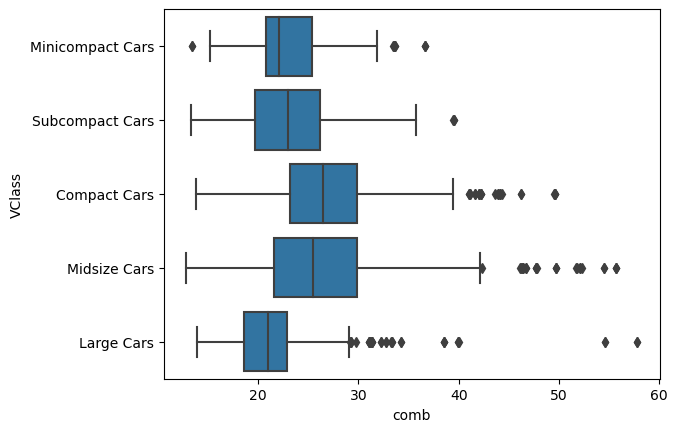

In [85]:
sns.boxplot(data=fuel_econ, y='VClass', x='comb', color=base_color);

### Violin plot with quartile information in the middle

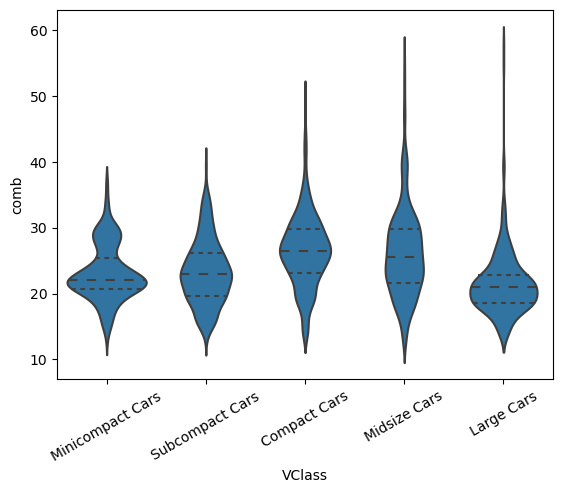

In [86]:
base_color = sns.color_palette()[0]
sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=30);